<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/1/MLP_Basics_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from google.colab import files
import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size




import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error


# Data

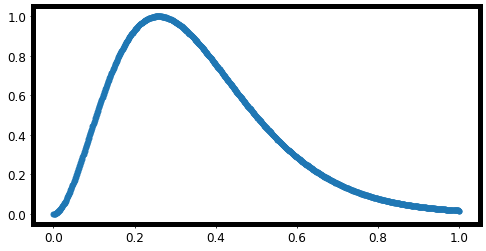

In [ ]:
bbr_data_url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/bbr.xls?raw=true"

bbr_data = pd.read_excel(bbr_data_url)

# bbr_data = pd.read_excel('bbr.xls')

data = bbr_data[[0,'T']]

# data.head()



X = data[0]
Y = data['T']

from sklearn.preprocessing import minmax_scale
X = minmax_scale(X.values.reshape(-1,1) )
Y = minmax_scale(Y.values.reshape(-1,1) )
# X = StandardScaler().fit_transform( X.values.reshape(-1,1) )



plt.scatter(X,Y)
plt.show()

578
193


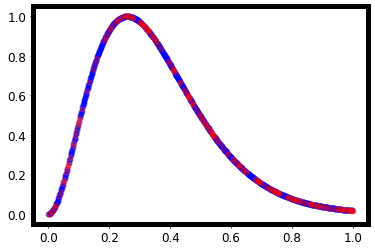

In [ ]:
from sklearn.model_selection import train_test_split

## It is important to shuffle the data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)

print( len(X_train) )
print( len(X_test ) )
plt.scatter(X_train, Y_train, color = 'b', alpha=.5)
plt.scatter(X_test, Y_test, color = 'r', alpha=.3)

Model Selection
=================

Often, our first toy model or estimator does not return a good accuracy and we need to play around and figure out what we need to change. The first two natural questions are 

- Is the model that we are trying good enough to capture the behviour of our data?
- Do we have enough data

Here we describe a procedure that helps us find the answers to these questions and systematically choose the right model and find a good set of hyper-parameters for our model.

# Reminder: Overfitting and underfitting 

## Training with limited data and finding the right model



This is the result of training with 6 points.



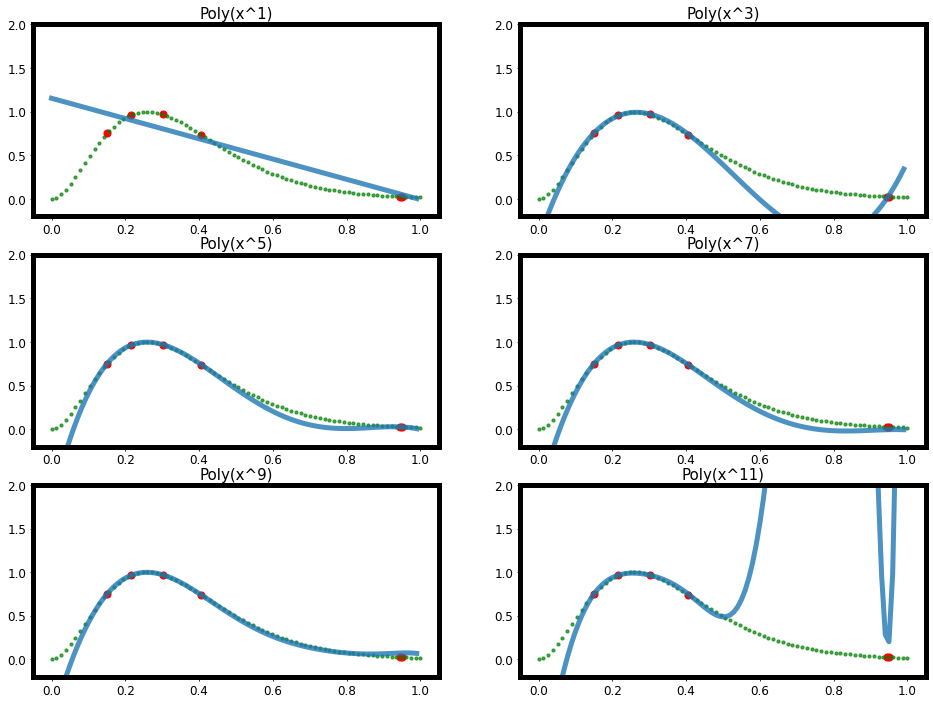

In [ ]:
n_rate = 100   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')


from sklearn.preprocessing import PolynomialFeatures
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_in = poly_features(X_train[::n_rate], deg)

    ## Construct m as X^T.X
    m = np.dot(x_in.T,x_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_in.T, Y_train[::n_rate]))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X_train[::n_rate], Y_train[::n_rate], s = 50, c = 'r')
    ax.scatter(X[::10], Y[::10], s = 10, c = 'g', alpha=.7)
    # ax.scatter(X, Y, s = 50, c = 'r', alpha =.5)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list, alpha = .8)

## It helps to have more data.

This is the result of training with 6 points.



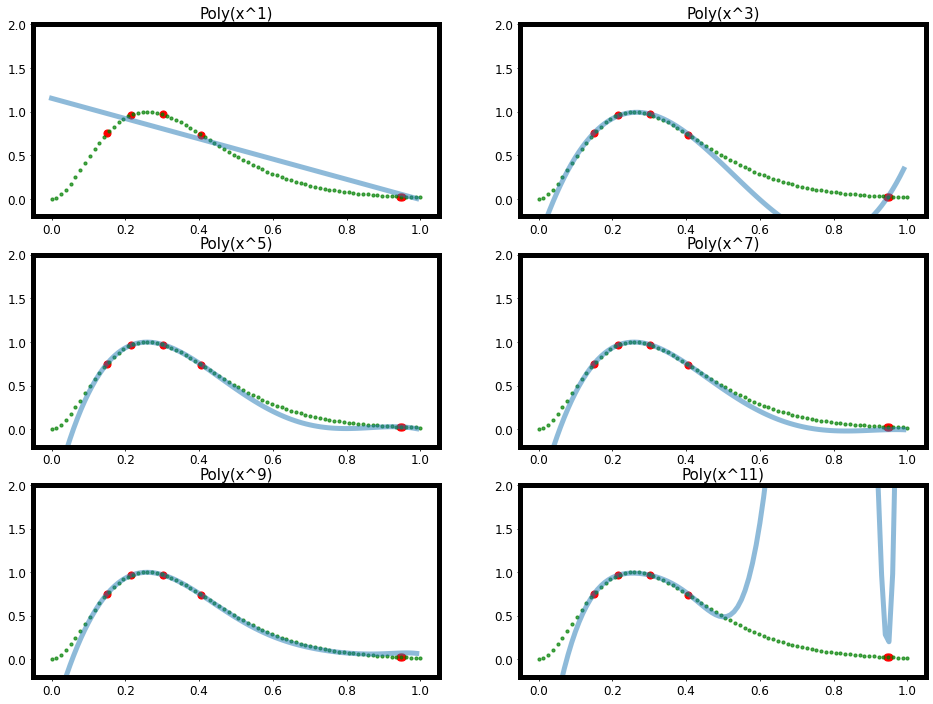

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)


n_rate = 100   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')

from sklearn.preprocessing import PolynomialFeatures
def poly_features(x, deg):
    return np.hstack([x**(deg-d) for d in np.arange(deg+1) ])


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7, 9, 11]
ind = 0
for deg in deg_list:
    ind +=1
    ## Make the X matrix with powers of the x
    x_in = poly_features(X_train[::n_rate], deg)

    ## Construct m as X^T.X
    m = np.dot(x_in.T,x_in)

    ## This gives the w
    w = np.dot(np.linalg.inv(m),np.dot(x_in.T, Y_train[::n_rate]))
#     print(deg, w.reshape(-1))
    

    ## Add the plot
    y_rg_list = np.dot(poly_features(x_range, deg), w)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Poly(x^{deg})')
    ax.scatter(X_train[::n_rate], Y_train[::n_rate], s = 50, c = 'r')
    ax.scatter(X[::10], Y[::10], s = 10, c = 'g', alpha=.7)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list, alpha =.5)

There are two questions we need to answer



*   How much complexity?
*   How much data?

We'll go through some tools that will help us figure these out. 



Bias and Variance Trade-off
==

The main tools we need for this part come from statistical learning. Namely we will go through the concept of Bias and Variance and the trade-off between them. We then use ''learning curve' and 'validation curve' to get a sense of how much data we need and how complex we should make our model. 

We will introduce some more tools later. 

In [ ]:
X = minmax_scale(data[0].values.reshape(-1,1) )
Y = minmax_scale(data['T'].values.reshape(-1,1) )

print(len(X))
noise = np.random.normal(0, .2, Y.shape)
Y = Y + noise


771


## Learning Curve

This is a tool that help us figure out how much data we need. 

In [ ]:
%%time
poly_scores = []


polytransform = PolynomialFeatures( degree=2 )
# bbr_reg_poly = LinearRegression(n_jobs=-1)
bbr_reg_poly = Ridge()


n_tot = int(len(data) )    ## Total number of samples
n_points = 25              ## Number of points for the learning curve plot
ns_list = [  7, 10, 15, 30, 50, 80, 150, 200, 400]  ## Number of points we keep for training. 

n_avg = 200                ## Number of times to average over

for ns in ns_list:        ## For different subset-sizes we try training our estimator
  e_in = 0
  e_out = 0               ## For each, we record the in and out score. 
  for i in range(n_avg):    
    sample_data = data.sample(ns)
    X_train, X_test, Y_train, Y_test = train_test_split(sample_data[0].values.reshape(-1,1), sample_data['T'], random_state = 0)

    bbr_reg_poly.fit(       polytransform.fit_transform( X_train )      , Y_train )

    e_in  += mean_squared_error( Y_train, bbr_reg_poly.predict(polytransform.fit_transform( X_train ) ) )
    e_out += mean_squared_error( Y_test , bbr_reg_poly.predict(polytransform.fit_transform( X_test ) )  )
  
  poly_scores += [[e_in/n_avg, e_out/n_avg]]

  
poly_scores = np.array(poly_scores)  

CPU times: user 4.84 s, sys: 44.4 ms, total: 4.88 s
Wall time: 4.86 s


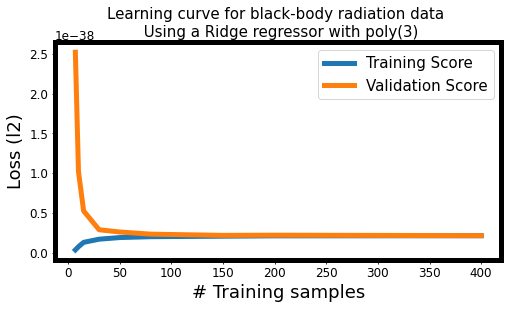

In [ ]:
xlabel = '# Training samples'
ylabel = 'Loss (l2)'
plt_title = 'Learning curve for black-body radiation data \n Using a Ridge regressor with poly(3)'
fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ns_list, poly_scores[:,0], label = 'Training Score')
ax2.plot(ns_list, poly_scores[:,1], label = 'Validation Score')
ax2.legend(loc=0)
# ax2.set_ylim(0, poly_scores[3:,1].max())

plt.show()

In [ ]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.linear_model import LinearRegression, Ridge
# # from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

from sklearn.model_selection import KFold
from sklearn.base import clone

def mse_loss(Y, Y_pred):
  return np.sum( (Y -  Y_pred)**2 )/len(Y)

# function for learning curve
def plot_lc(model, X, Y, ns_list, n_cv=5):
  kf = KFold(n_cv)
  lc_list = []

  X_train , X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0)
  for ns in ns_list:
    X_sml, Y_sml = shuffle( X_train[:ns], Y_train[:ns])
        
    in_loss = []
    out_loss = []
    model_cp =  clone(model)
    for train, test in kf.split(X_sml):
      _X_train, X_val, _Y_train, Y_val = X_sml[train], X_sml[test], Y_sml[train], Y_sml[test]
      model_cp.fit( _X_train,  _Y_train)
      in_loss += [mse_loss(Y_val, model_cp.predict(  X_val  ) )  ]
      out_loss += [mse_loss(Y_test, model_cp.predict(  X_test  ) )  ]

    lc_list += [ [in_loss , out_loss] ]
    
  lc_list = np.array(lc_list)
  ## Calculating the mean for the performance of the model. 
  train_scores_mean = lc_list[:, 0].mean(axis = 1)
  validation_scores_mean = lc_list[:, 1].mean(axis = 1)
  # print(train_scores_mean- validation_scores_mean )

  ## Calculating the variance
  train_scores_std = lc_list[:, 0].var(axis = 1)
  validation_scores_std = lc_list[:, 1].var(axis = 1)


  ##Plotting the result
  xlabel = '# Training samples'
  ylabel = 'Loss (MSE)'
  plt_title = 'Learning curve'
  fig = plt.figure()
  ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
  ax.plot(ns_list, train_scores_mean, label = 'Training Score')
  ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

  plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                  train_scores_mean + train_scores_std, alpha=0.2,
                  color="darkblue", lw=2)
  plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                  validation_scores_mean + validation_scores_std, alpha=0.2,
                  color="darkgreen", lw=2)


  ax.legend(loc=0)
  ax.set_ylim(-3, 1.5*validation_scores_mean.max())


  return None #np.array(lc_list)
  

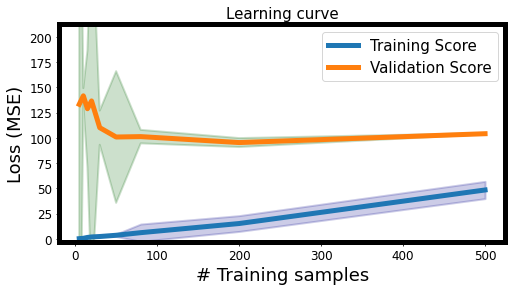

In [ ]:
ns_list = [5, 10, 15 , 20,  30, 50, 80, 200, 500]

#Let's add some noise.
noise = np.random.normal(0, .5, Y.shape)
Y = Y + noise

from sklearn.svm import SVR
plot_lc(SVR(kernel = 'poly' ), X, Y, ns_list, n_cv = 5)

In [ ]:
%%time
svr_scores = []
from sklearn.preprocessing import minmax_scale


opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR
svr = SVR(**opt_svr_param  )

svr = SVR(kernel='poly', degree=2, gamma=11,epsilon=.0015, C=.04 )

n_tot = int(len(data) )
n_points = 10
# ns_list = np.arange(int(n_tot/n_points)-1,n_tot , int(n_tot/n_points) )
ns_list=np.array([ 2, 5, 10, 20 , 30 , 50, 76, 153, 307])
n_avg = 200

for ns in ns_list:
  e_in = 0
  e_out = 0
  for i in range(n_avg):
    
    sample_data = data.sample(ns)
    ## We'll come back to why we do the following scaling. 
    X_train, X_test, Y_train, Y_test = train_test_split( minmax_scale(sample_data[0].values.reshape(-1,1)) , 
                                                        sample_data['T']/sample_data['T'].mean(), random_state = 0)

    
    svr.fit(X_train,Y_train)
    e_in  += mean_squared_error(  Y_train, svr.predict(X_train )  )
    e_out += mean_squared_error(  Y_test,  svr.predict(X_test  )  )
  
  svr_scores += [[e_in/n_avg, e_out/n_avg]]

svr_scores = np.array(svr_scores)  

CPU times: user 5.97 s, sys: 62.3 ms, total: 6.03 s
Wall time: 5.99 s


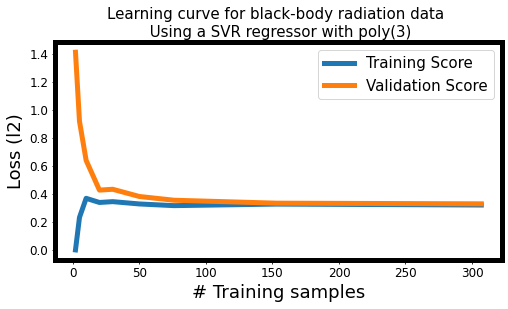

In [ ]:
plt_title = 'Learning curve for black-body radiation data \n Using a SVR regressor with poly(3)'

fig = plt.figure()
ax2 = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax2.plot(ns_list, svr_scores[:,0], label = 'Training Score')
ax2.plot(ns_list, svr_scores[:,1], label = 'Validation Score')
ax2.legend(loc=0)
plt.show()

### How to do this in sklearn

In [ ]:
from sklearn.model_selection import learning_curve, validation_curve

In [ ]:


ns_list=np.array([ 2, 5, 10, 20 , 30 , 50, 76, 153, 307, 500])

## Here's how you can use the function implemented in sklearn for this. 
## But note that this works with scores instead of loss. 

ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator = SVR(**opt_svr_param), 
                                                   X = X, y = Y, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [ ]:
train_scores.shape

(10, 5)

In [ ]:
print('Training scores:\n\n', pd.DataFrame( train_scores) )
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', pd.DataFrame(validation_scores) )

Training scores:

           0         1         2         3         4
0 -0.015634 -0.005704 -0.005704 -0.005704 -0.005704
1 -0.013270 -0.024694 -0.024694 -0.024694 -0.024694
2 -0.017004 -0.017550 -0.017550 -0.017550 -0.017550
3 -0.032555 -0.018762 -0.018762 -0.018762 -0.018762
4 -0.034073 -0.022362 -0.022362 -0.022362 -0.022362
5 -0.031051 -0.035499 -0.035499 -0.035499 -0.035499
6 -0.032309 -0.043923 -0.043923 -0.043923 -0.043923
7 -0.041034 -0.047706 -0.047706 -0.047706 -0.047706
8 -0.040798 -0.044487 -0.042322 -0.042322 -0.042322
9 -0.041040 -0.043090 -0.041571 -0.041774 -0.041143

 ----------------------------------------------------------------------

Validation scores:

           0         1         2         3         4
0 -0.248177 -0.903982 -0.345150 -0.080087 -0.045778
1 -0.336584 -0.979997 -0.389189 -0.096158 -0.055107
2 -0.353013 -0.853334 -0.316853 -0.070975 -0.041259
3 -0.348676 -0.912182 -0.348930 -0.081207 -0.046364
4 -0.348338 -0.789811 -0.285675 -0.062732 -0.038055
5 

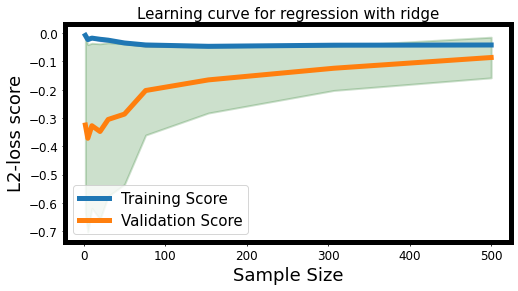

In [ ]:
train_scores_mean =  train_scores.mean(axis = 1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean =  validation_scores.mean(axis = 1)
validation_scores_std  = validation_scores.std(axis = 1)

xlabel = 'Sample Size'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with ridge'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

## Validation Curves

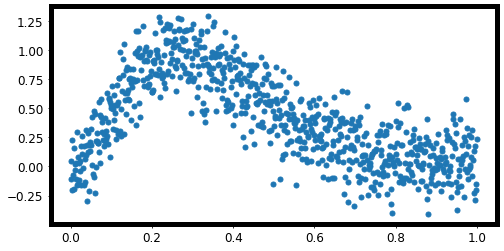

In [ ]:
plt.scatter(X,Y)

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 340 out of 340 | elapsed:    2.2s finished


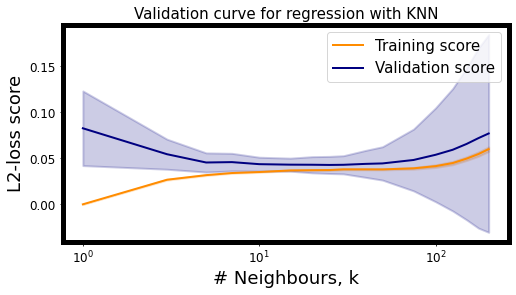

In [ ]:
k_list = [1,3,5,7,10, 15, 20, 25, 30, 40, 50 , 75,  100, 125, 150, 175, 200]

train_scores, valid_scores = validation_curve(KNeighborsRegressor(), X, Y, 
                                              param_name="n_neighbors",
                                              param_range=k_list , cv=20, 
                                              scoring = 'neg_mean_squared_error',
                                              verbose=1, n_jobs=-1
                                             )

train_scores_mean = - np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)


xlabel = '# Neighbours, k'
ylabel = 'L2-loss score'

plt_title = 'Validation curve for regression with KNN'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(k_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(k_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(k_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(k_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

# Regularization

One way to control the complexity is to regularize the model. Often we can avoid some of of the harsh behavours of the model (overfitting) with limiting or penalizing the  parameters of the model. For instance, we can penalize large values of w_i polynomial models. 

Let's see how that works. 

In [ ]:
X = minmax_scale(data[0].values.reshape(-1,1) )
Y = minmax_scale(data['T'].values.reshape(-1,1) )

# print(len(X))
noise = np.random.normal(0, .1, Y.shape)
Y = Y + noise

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)

This is the result of training with 12 points.



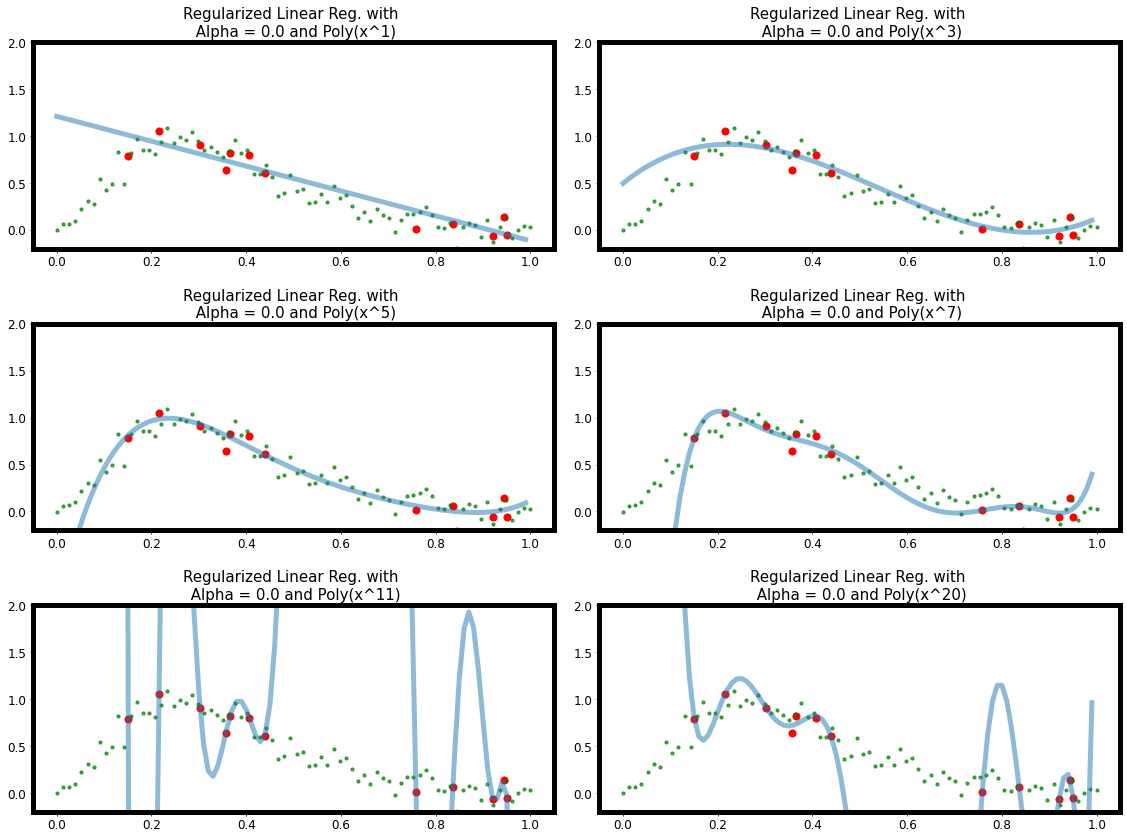

In [ ]:

n_rate = 50   #We only keep a subset of the points, every n_rate points. 
print(f'This is the result of training with {len(X_train[::n_rate])} points.\n')


from sklearn.linear_model import LinearRegression, Ridge, Lasso
##Let's have a regularization parameter. 
a = .00
reg = Ridge(alpha = a)

## It is convenient to make pipelines to get all the different pieces together.
from sklearn.pipeline import Pipeline


# for the plot
x_range = np.arange(0,1,.01).reshape(-1,1)

fig = plt.figure(figsize=(16,12))

deg_list = [1,3,5,7,  11, 20]
ind = 0
for deg in deg_list:
    ind +=1

    ## Bulding the model anf training it.
    polynomial_features = PolynomialFeatures(degree=deg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", reg)])
    pipeline.fit(X_train[::n_rate], Y_train[::n_rate])


    ## Generating a plot based on the predictions of the model. 
    y_rg_list = pipeline.predict(x_range)
    
    ax = fig.add_subplot(3, 2, ind ,  title = f'Regularized Linear Reg. with \n Alpha = {a} and Poly(x^{deg})')
    ax.scatter(X_train[::n_rate], Y_train[::n_rate], s = 50, c = 'r')
    ax.scatter(X[::10], Y[::10], s = 10, c = 'g', alpha=.7)
    ax.set_ylim(-.2, 2 )
    ax.plot(x_range, y_rg_list, alpha =.5)

plt.tight_layout()
plt.show()

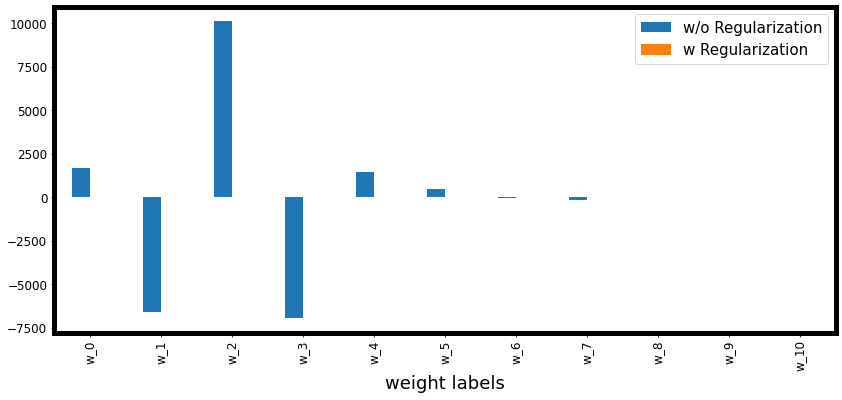

In [ ]:
### Let's see what the regularization does to a polynomial model. 
deg = 10
polynomial_features = PolynomialFeatures(degree=deg)

df = pd.DataFrame()

x_ticks = [f'w_{i}' for i in range(deg+1)]
df['weight labels'] = x_ticks

##Without regularization
reg = Ridge(alpha = 0).fit(poly_features( X, deg), Y)
df['w/o Regularization'] = reg.coef_[0]
##Without regularization
reg = Ridge(alpha = .01).fit(poly_features( X, deg), Y)
df['w Regularization'] = reg.coef_[0]

fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(111, xlabel='W s')
df.plot.bar(x = 'weight labels', y= ['w/o Regularization','w Regularization'],  ax = ax)
# plt.yscale('log')


## Exercise: Playing with regularization

Do what we did before for alpha, 

Plot loss for different values of alpha and check how the performance changes. 


Plots w's vs alpha for l1 and l2 and elasatic regularization. 


# Model Tuning

In [ ]:
X = minmax_scale(data[0].values.reshape(-1,1) )
Y = minmax_scale(data['T'].values.reshape(-1,1) )

noise = np.random.normal(0, .2, Y.shape)
Y = Y + noise

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, shuffle=True)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
%%time
k_list = [1, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 75, 100, 125, 150, 175, 200]
params = {'n_neighbors':k_list}
knn = KNeighborsRegressor()
reg_gs = GridSearchCV(knn, param_grid=params, n_jobs=-1, verbose=1, cv=50, scoring='neg_mean_squared_error')
reg_gs.fit(X_train, Y_train)
print( reg_gs.best_params_ )

print(f'The test score is {reg_gs.score(X_test, Y_test):.2f}.\n')

Y_pred = reg_gs.predict(X_test)
print(f'The MSE for the test data is {mean_squared_error(Y_test, Y_pred):.2f}.\n')

Fitting 50 folds for each of 17 candidates, totalling 850 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'n_neighbors': 30}
The test score is -0.04.

The MSE for the test data is 0.04.

CPU times: user 680 ms, sys: 13.1 ms, total: 693 ms
Wall time: 1.35 s


[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 850 out of 850 | elapsed:    1.3s finished


In [ ]:
%%time
svc_reg = SVR()
# params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
# params = {'degree':[1,2,3,4,5,6,7,8,9,10,11,12], 'gamma':[.001, .01,.1,1,10], 'C':[.001,.01,.1], 'epsilon' : [.001,.01,.1]}
params = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'),'degree':[3,4],'gamma':[11,12,13,14], 'C':[.015,.02,.04], 'epsilon' : [.0015,.002,.004]}
# params = {'kernel':('poly', 'rbf'),'degree':[3,4]}
svc_reg_gs = GridSearchCV(svc_reg, param_grid=params, n_jobs=-1, verbose=1, cv=5)
svc_reg_gs.fit(X_train, Y_train)
print(svc_reg_gs.best_params_)
print(svc_reg_gs.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.5s


{'C': 0.04, 'degree': 3, 'epsilon': 0.0015, 'gamma': 14, 'kernel': 'rbf'}
0.7116015351441819
CPU times: user 1.34 s, sys: 48.1 ms, total: 1.39 s
Wall time: 27.2 s


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   27.1s finished


In [ ]:
print( svc_reg_gs.best_params_ )

Y_pred = svc_reg_gs.predict(X_test)
print(f'The MSE for the test data is {mean_squared_error(Y_test, Y_pred):.2f}.\n')

# svc_reg_gs.predict(X[:2])

{'C': 0.04, 'degree': 3, 'epsilon': 0.0015, 'gamma': 14, 'kernel': 'rbf'}
The MSE for the test data is 0.04.



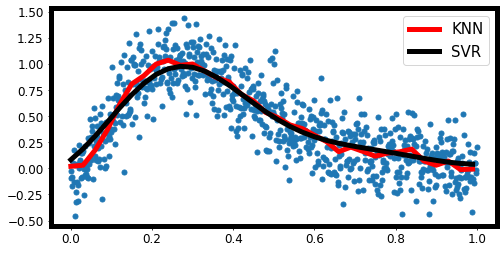

In [ ]:
plt.scatter(X,Y)
plt.plot(np.arange(0,1,.03) ,reg_gs.predict( np.arange(0,1,.03).reshape(-1,1) ), color='r', label = 'KNN')
plt.plot(np.arange(0,1,.03) ,svc_reg_gs.predict( np.arange(0,1,.03).reshape(-1,1) ), color='black', label = 'SVR')
plt.legend(loc=0)
plt.show()

#### Randomized

# Exercise: Classification

In [ ]:
#https://drive.google.com/file/d/17UKL0GGf9VljROIaG3UMa6lVl3rWYAtc/view

url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

targets = list(set(data['id']))
data['target'] = data['id'].apply(lambda x: targets.index(x)) 
data.drop('id',axis=1, inplace=True)

data.head()

,p,theta,beta,nphe,ein,eout,target
0,0.780041,1.081480,0.989962,0,0.000000,0.000000,1
1,0.260929,0.778892,0.902450,0,0.000000,0.000000,1
2,0.773022,0.185953,0.642428,4,0.101900,0.000000,2
3,0.476997,0.445561,0.951471,0,0.000000,0.000000,1
4,2.123290,0.337332,0.908652,0,0.034379,0.049256,2


In [ ]:
ns_tot=5000
features = data.columns[ [0, 1,2,3,4,5] ]
ind_1 = 1
ind_2 = 2
data = data[ (data['target']==ind_1) | (data['target']==ind_2) ]

m_data = data.sample(ns_tot)

X_train, X_test, Y_train, Y_test = train_test_split(m_data[features], m_data['target'], random_state = 0)


In [ ]:
%%time
from scipy.stats import expon
params_dist = {'C': expon(scale=10), 'gamma':expon(scale=10)}
from sklearn.svm import SVC

clf = SVC()
opt_clf = RandomizedSearchCV(clf, param_distributions=params_dist, cv=5, n_jobs=-1)
opt_clf.fit(X_train,Y_train)

CPU times: user 442 ms, sys: 39.3 ms, total: 481 ms
Wall time: 6.52 s


In [ ]:
print( f'The optimal values for C and gamma are {opt_clf.best_params_}.\n' )

Y_pred = opt_clf.predict(X_test)
print(f'The MSE for the test data is {mean_squared_error(Y_test, Y_pred):.2f}.\n')


The optimal values for C and gamma are {'C': 8.127428689163654, 'gamma': 1.1924444761878354}.

The MSE for the test data is 0.02.



In [ ]:
%%time
from scipy.stats import expon
params_dist = {'C': expon(scale=10), 'gamma':expon(scale=10)}

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer, confusion_matrix
pos_label = ind_1
# del(pos_label)
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'precision':make_scorer(precision_score, pos_label=pos_label)
           , 'recall':make_scorer(recall_score, pos_label=pos_label), 'f1':make_scorer(f1_score, pos_label=pos_label)}

opt_clf = RandomizedSearchCV(clf, param_distributions=params_dist, cv=5, n_jobs=-1, refit='precision', scoring=scoring)
opt_clf.fit(X_train,Y_train)

result = pd.DataFrame(opt_clf.cv_results_)
result

CPU times: user 472 ms, sys: 48.9 ms, total: 521 ms
Wall time: 7.61 s


In [ ]:
result.shape

(10, 47)

Take a model such as SVC and optimize the parameters using gird search. 

In [ ]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,split4_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.198951,0.004399,0.081793,0.002212,0.592097,17.9799,"{'C': 0.5920965850480677, 'gamma': 17.97992886...",0.990507,0.991462,0.995159,0.993312,0.996204,0.993329,0.002148,7,0.965333,0.952000,0.954667,0.968000,0.964000,0.960800,0.006288,10,0.959368,0.950113,0.940397,0.957494,0.951111,0.951697,0.006678,10,0.981524,0.967667,0.983834,0.988453,0.988453,0.981986,0.007646,5,0.970320,0.958810,0.961625,0.972727,0.969422,0.966581,0.005381,10
1,0.158682,0.005319,0.063564,0.001853,1.12679,2.40916,"{'C': 1.1267888718494359, 'gamma': 2.409156035...",0.991513,0.993480,0.996816,0.995301,0.992474,0.993917,0.001917,5,0.973333,0.962667,0.970667,0.977333,0.974667,0.971733,0.005017,8,0.979118,0.976471,0.968109,0.972727,0.976959,0.974677,0.003875,4,0.974596,0.958430,0.981524,0.988453,0.979215,0.976443,0.010056,8,0.976852,0.967366,0.974771,0.980527,0.978085,0.975520,0.004483,8
2,0.180925,0.005071,0.073883,0.002562,0.613974,10.8047,"{'C': 0.6139743512868432, 'gamma': 10.80467904...",0.990485,0.990981,0.995549,0.993319,0.993483,0.992763,0.001841,9,0.969333,0.958667,0.968000,0.969333,0.970667,0.967200,0.004349,9,0.968037,0.961009,0.961625,0.959641,0.963883,0.962839,0.002938,9,0.979215,0.967667,0.983834,0.988453,0.986143,0.981062,0.007361,6,0.973594,0.964327,0.972603,0.973834,0.974886,0.971849,0.003830,9
3,0.108704,0.002989,0.042375,0.003874,19.6489,0.438668,"{'C': 19.648889568794083, 'gamma': 0.438667504...",0.991738,0.994645,0.997334,0.996124,0.992777,0.994524,0.002063,2,0.980000,0.974667,0.977333,0.977333,0.973333,0.976533,0.002325,2,0.988318,0.983645,0.974886,0.977064,0.983607,0.981504,0.004877,2,0.976905,0.972286,0.986143,0.983834,0.969977,0.977829,0.006299,7,0.982578,0.977933,0.980482,0.980437,0.976744,0.979635,0.002063,2
4,0.121322,0.004512,0.046562,0.001203,23.2307,0.108044,"{'C': 23.23066409792945, 'gamma': 0.1080441389...",0.989953,0.992882,0.995519,0.995403,0.991148,0.992981,0.002229,8,0.978667,0.974667,0.982667,0.980000,0.969333,0.977067,0.004649,1,0.990588,0.983645,0.981651,0.981567,0.985782,0.984647,0.003348,1,0.972286,0.972286,0.988453,0.983834,0.960739,0.975520,0.009755,9,0.981352,0.977933,0.985040,0.982699,0.973099,0.980025,0.004157,1
5,0.131692,0.005100,0.046117,0.001047,14.6177,5.98235,"{'C': 14.617710298451865, 'gamma': 5.982346464...",0.993327,0.994245,0.997880,0.994485,0.993778,0.994743,0.001618,1,0.976000,0.968000,0.977333,0.972000,0.977333,0.974133,0.003637,6,0.974828,0.970115,0.966368,0.963964,0.977064,0.970468,0.004935,8,0.983834,0.974596,0.995381,0.988453,0.983834,0.985219,0.006788,3,0.979310,0.972350,0.980660,0.976055,0.980437,0.977762,0.003167,6
6,0.131320,0.006375,0.047962,0.001096,5.93738,4.33136,"{'C': 5.93738231164609, 'gamma': 4.33136333595...",0.992474,0.992664,0.998033,0.992962,0.993305,0.993888,0.002092,6,0.977333,0.972000,0.980000,0.972000,0.978667,0.976000,0.003373,3,0.979263,0.972477,0.970721,0.961883,0.979310,0.972731,0.006446,5,0.981524,0.979215,0.995381,0.990762,0.983834,0.986143,0.006022,1,0.980392,0.975834,0.982896,0.976109,0.981567,0.979360,0.002879,3
7,0.123325,0.005116,0.042435,0.000886,16.9388,3.53019,"{'C': 16.938829354309476, 'gamma': 3.530185486...",0.993232,0.993327,0.998295,0.993494,0.993385,0.994347,0.001976,3,0.978667,0

The classification report is: 
               precision    recall  f1-score   support

           1       0.99      0.97      0.98       745
           2       0.95      0.98      0.97       505

    accuracy                           0.97      1250
   macro avg       0.97      0.97      0.97      1250
weighted avg       0.97      0.97      0.97      1250



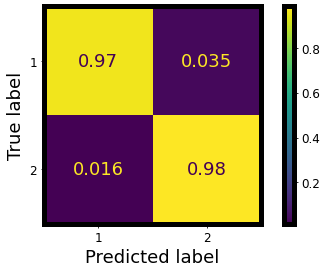

In [ ]:
opt_predicted_Y = opt_clf.predict(X_test)
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(opt_clf, X_test, Y_test, normalize='true')

print('The classification report is: \n {}'.format(classification_report(Y_test, opt_predicted_Y) ) )